# PyERM Usage Example (Clustering)

In [1]:
# import the necessary packages
import pyerm
from PIL import Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment as linear_assignment

In [2]:
def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1

    # from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    ind = np.array((ind[0], ind[1])).T
    # pdb.set_trace()
    y_pred_reassigned = np.zeros(y_pred.shape)
    for i in range(y_pred.size):
        y_pred_reassigned[i] = ind[y_pred[i], 1]
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [3]:
def demo_experiment(exp: pyerm.Experiment):
    # task init
    exp.task_init("Clustering")

    # data generation & init
    dataset_params = {
        "n_samples_one_type": 100,
        "mean1": np.random.rand(2),
        "cov1": np.random.rand(2, 2),
        "mean2": np.random.rand(2),
        "cov2": np.random.rand(2, 2),
        "mean3": np.random.rand(2),
        "cov3": np.random.rand(2, 2),
    }
    data_id = exp.data_init("2D_Gaussian_Data", dataset_params)
    print(f"data_id: {data_id}")

    # method init
    method_params = {
        'n_clusters': 3,
        'random_state': np.random.randint(100),
    }
    method_id = exp.method_init("KMeans", method_params)
    print(f"method_id: {method_id}")

    # data generation & processing
    data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
    data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
    data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
    X = np.vstack((data1, data2, data3))
    y_true = np.array([0]*100 + [1]*100 + [2]*100)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y_true = y_true[indices]

    # method execution
    kmeans = KMeans(**method_params)
    exp.experiment_start(f"This is the {exp.run_times+1}th experiment", tags=['demo', 'test'], experimenters=['Alice', 'Bob'])
    y_pred = kmeans.fit_predict(X)

    accuracy = cluster_acc(y_true, y_pred)
    print(f'Clustering accuracy: {accuracy:.2f}')

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax = plt.subplot(1, 2, 1)
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    ax.set_title('KMeans Clustering of 2D Gaussian Data')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
    ax = plt.subplot(1, 2, 2)
    ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o')
    ax.set_title('True Clustering of 2D Gaussian Data')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)

    image = Image.open(buf)

    # experiment over and result saving
    rst_dict = {
        'accuracy': accuracy,
    }
    img_dict = {
        f'clustering_result_{exp.run_times+1}': image,
    }
    exp.experiment_over(rst_dict, img_dict)



Table experiment_list created
Table data_2D_Gaussian_Data created
data_id: 1
Table method_KMeans created
method_id: 1
Clustering accuracy: 0.38


C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
c:\Users\main\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

Table result_Clustering created
Table data_2D_Gaussian_Data already exists
data_id: 2
Table method_KMeans already exists
method_id: 2
Clustering accuracy: 0.48


C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
c:\Users\main\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

Table data_2D_Gaussian_Data already exists
data_id: 3
Table method_KMeans already exists
method_id: 3
Clustering accuracy: 0.47


C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
c:\Users\main\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

Table data_2D_Gaussian_Data already exists
data_id: 4
Table method_KMeans already exists
method_id: 4
Clustering accuracy: 0.41


C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
c:\Users\main\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

Table data_2D_Gaussian_Data already exists
data_id: 5
Table method_KMeans already exists
method_id: 2
Clustering accuracy: 0.43


C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data1 = np.random.multivariate_normal(dataset_params['mean1'], dataset_params['cov1'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(dataset_params['mean2'], dataset_params['cov2'], dataset_params['n_samples_one_type'])
C:\Users\main\AppData\Local\Temp\ipykernel_28820\4263856162.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data3 = np.random.multivariate_normal(dataset_params['mean3'], dataset_params['cov3'], dataset_params['n_samples_one_type'])
c:\Users\main\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

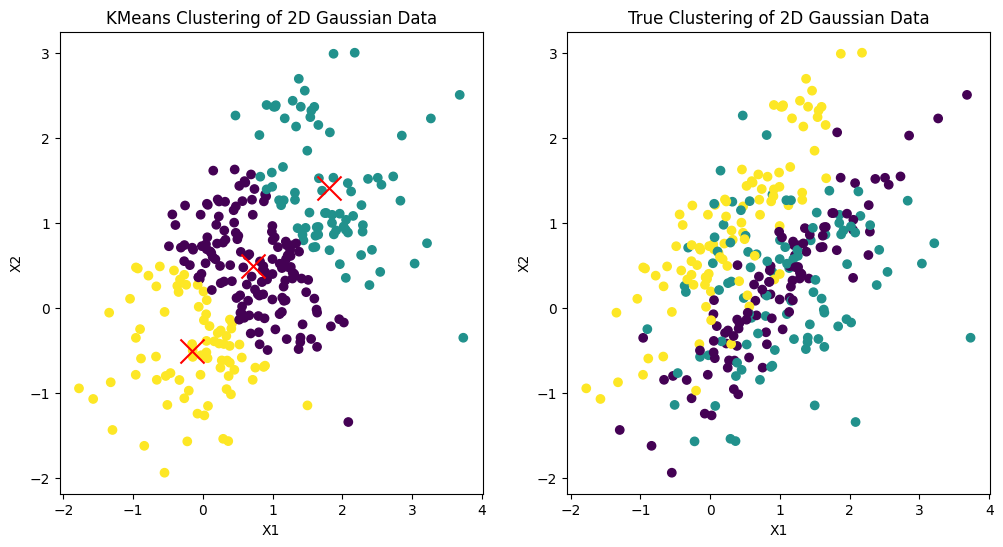

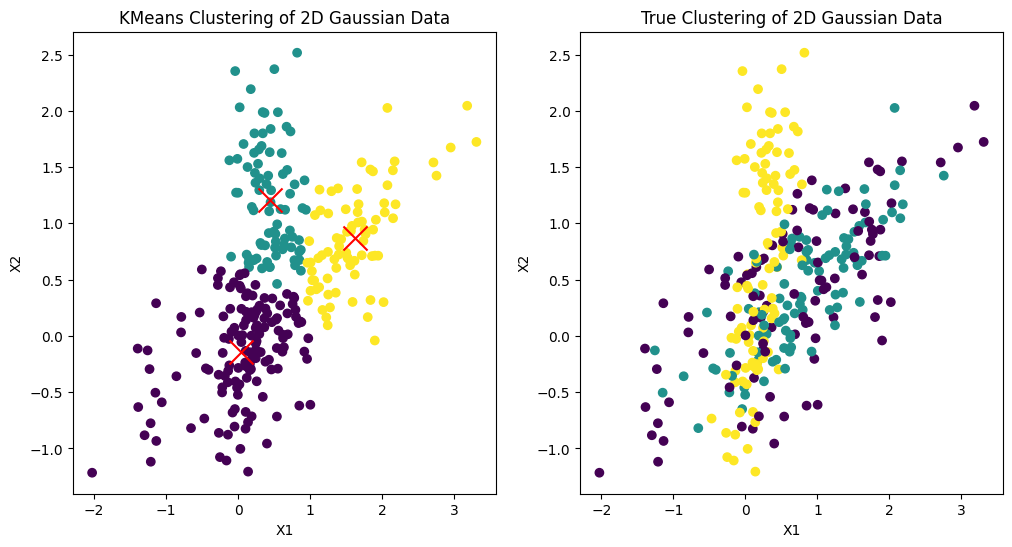

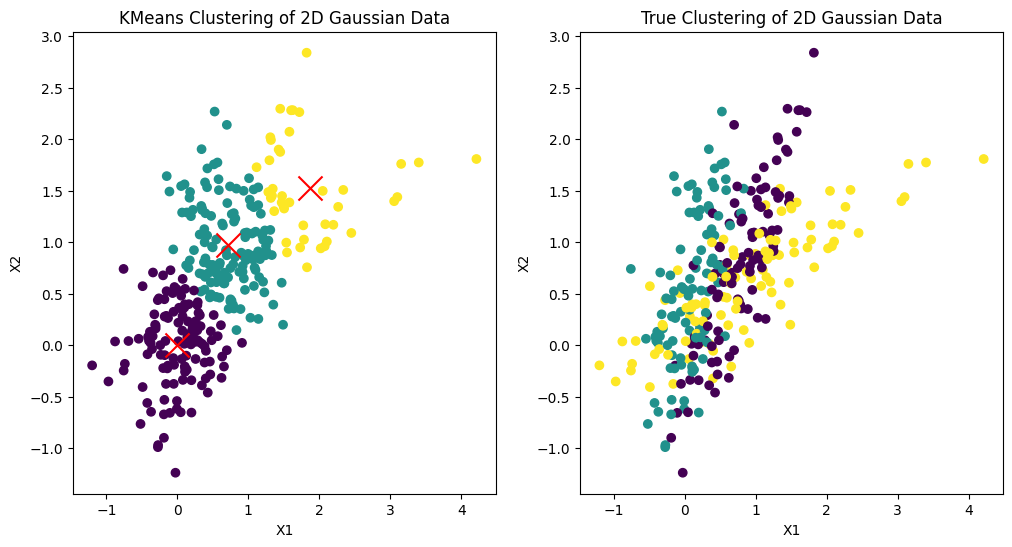

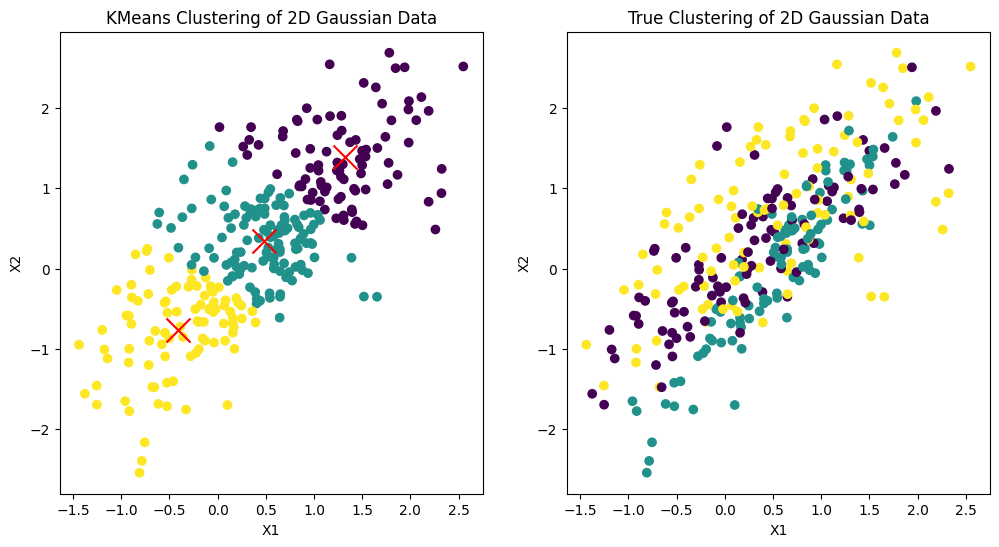

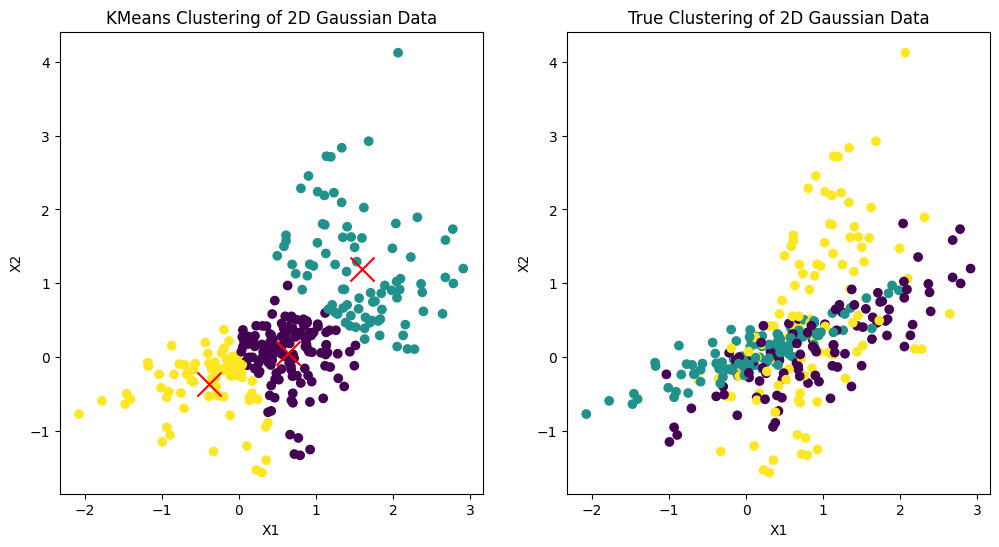

In [4]:
# hyperparameters for the experiment

# the default path is '~/pyerm/experiments.db'
exp = pyerm.Experiment("./experiments.db")
for i in range(5):
    demo_experiment(exp)


In [5]:
!pyerm_webui

^C
